In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())


c:\Users\Amanda\Documents\Capstone\DSE6311OM_Group3\Notebook


In [3]:
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/clean_data.xlsx", index_col =0)


In [4]:
df.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,2.423144e+07,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,1.280195e+07,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,1.506501e+07,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,37880.000


# E.T.
#### Encoding the categorical values

In [5]:
df['overall_classification'].unique()

array(['Not requiring assistance or intervention',
       'Requiring assistance or intervention', 'Insufficient data'],
      dtype=object)

In [6]:
df['reason_for_classification'].unique()

array(['Meeting or exceeding targets', 'Moderate progress toward targets',
       'In need of focused/targeted support',
       'Limited or no progress toward targets',
       'Substantial progress toward targets', 'Insufficient data',
       'In need of broad/comprehensive support'], dtype=object)

# E.T.
**There are 3 categories in Overall_Classification, and 7 categories in Reason_for _Classification features. There is also "insufficient data" in both columns that we need to address before we do One Hot Encoding**

In [7]:
## Value counts for each categorical variables

df['overall_classification'].value_counts()

overall_classification
Not requiring assistance or intervention    236
Requiring assistance or intervention         11
Insufficient data                             1
Name: count, dtype: int64

In [8]:
df['reason_for_classification'].value_counts()

reason_for_classification
Moderate progress toward targets          106
Substantial progress toward targets        89
Meeting or exceeding targets               37
In need of focused/targeted support         8
Limited or no progress toward targets       4
In need of broad/comprehensive support      3
Insufficient data                           1
Name: count, dtype: int64

In [9]:
# Rows where overall_classification is 'Insufficient data'
print(df[df['overall_classification'] == 'Insufficient data'][['graduation_rate_pct']])


# Rows where reason_for_classification is 'Insufficient data'
print(df[df['reason_for_classification'] == 'Insufficient data'][['graduation_rate_pct']])


               graduation_rate_pct
district_name                     
Hatfield                      92.3
               graduation_rate_pct
district_name                     
Hatfield                      92.3


# E.T.
**These schools have insufficient data in categorical variables because some of these serves over-age or non traditinoanl students. cohort are often small or inconsistent.**

In [10]:
# Lets see how many school name has "charter" in their name 
charter_schools = df[df.index.str.contains("charter", case=False)]

# Print number of charter schools
print(f"Number of schools/districts with 'charter' in the name: {len(charter_schools)}")


Number of schools/districts with 'charter' in the name: 24


In [11]:
df.shape

(248, 17)

In [12]:
# E.T.
## Drop the rows which has "insufficent data" in either categorical columns 

df = df[
    (df['overall_classification'] != 'Insufficient data') &
    (df['reason_for_classification'] != 'Insufficient data')]

In [13]:
df.shape

(247, 17)

In [14]:
df['overall_classification'].value_counts()

overall_classification
Not requiring assistance or intervention    236
Requiring assistance or intervention         11
Name: count, dtype: int64

In [15]:
df['reason_for_classification'].value_counts()

reason_for_classification
Moderate progress toward targets          106
Substantial progress toward targets        89
Meeting or exceeding targets               37
In need of focused/targeted support         8
Limited or no progress toward targets       4
In need of broad/comprehensive support      3
Name: count, dtype: int64

In [16]:
df.columns

Index(['high_needs_pct', 'english_learners_pct', 'low_income_pct',
       'students_with_disabilities_pct', 'overall_classification',
       'reason_for_classification', 'progress_toward_improvement_targets_pct',
       'in_district_expenditures', 'in_district_expenditures_per_pupil',
       'graduation_rate_pct', 'still_in_school_pct', 'non_grad_completers_pct',
       'hs_equivalency_pct', 'dropout_rate_pct', 'student_teacher_ratio',
       'experienced_teachers_pct', 'DOR_income_per_capita'],
      dtype='object')

In [17]:
# Summary stats
df[['graduation_rate_pct', 'in_district_expenditures_per_pupil', 'student_teacher_ratio']].describe()

,graduation_rate_pct,in_district_expenditures_per_pupil,student_teacher_ratio
count,247.000000,247.000000,247.000000
mean,91.081781,20380.481862,11.752227
std,7.018097,3692.645798,1.557954
min,64.100000,14470.090000,6.700000
25%,88.750000,17747.515000,10.700000
50%,93.000000,19521.740000,11.800000
75%,95.900000,22329.665000,12.900000
max,100.000000,36789.060000,16.600000


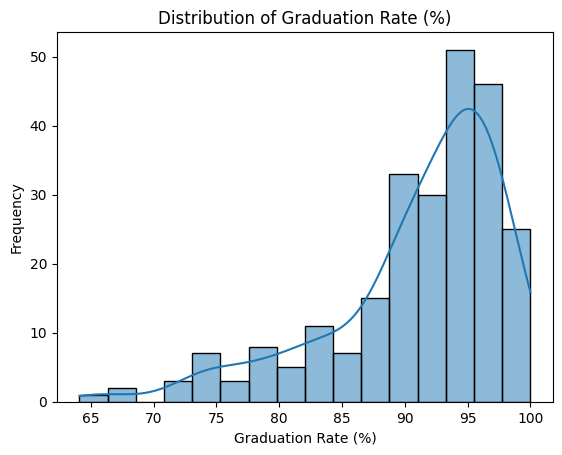

In [18]:
# F.R. & E.T.
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram and KDE for Graduation Rate
sns.histplot(df['graduation_rate_pct'], kde=True)
plt.title("Distribution of Graduation Rate (%)")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()


In [19]:
df.columns

Index(['high_needs_pct', 'english_learners_pct', 'low_income_pct',
       'students_with_disabilities_pct', 'overall_classification',
       'reason_for_classification', 'progress_toward_improvement_targets_pct',
       'in_district_expenditures', 'in_district_expenditures_per_pupil',
       'graduation_rate_pct', 'still_in_school_pct', 'non_grad_completers_pct',
       'hs_equivalency_pct', 'dropout_rate_pct', 'student_teacher_ratio',
       'experienced_teachers_pct', 'DOR_income_per_capita'],
      dtype='object')

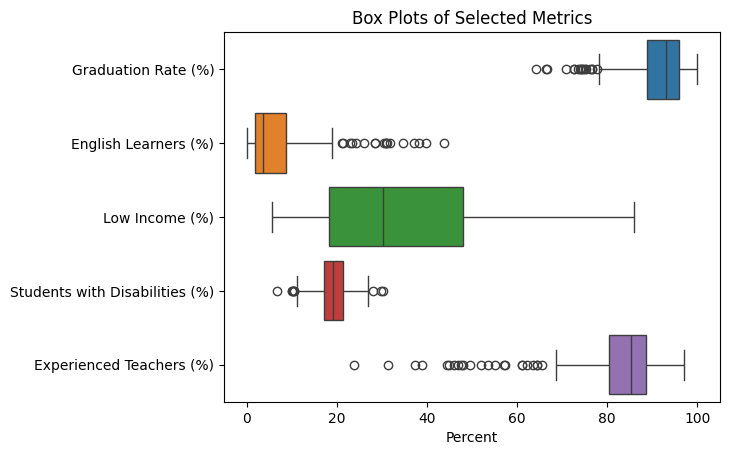

In [20]:
#A.F. & E.T.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy with nicer column labels
plot_df = df[[
    'graduation_rate_pct',
    'english_learners_pct',
    'low_income_pct',
    'students_with_disabilities_pct',
    'experienced_teachers_pct'
]].rename(columns={
    'graduation_rate_pct': 'Graduation Rate (%)',
    'english_learners_pct': 'English Learners (%)',
    'low_income_pct': 'Low Income (%)',
    'students_with_disabilities_pct': 'Students with Disabilities (%)',
    'experienced_teachers_pct': 'Experienced Teachers (%)'
})

# Create box plots
sns.boxplot(data=plot_df, orient='h')
plt.title("Box Plots of Selected Metrics")
plt.xlabel("Percent")
plt.show()



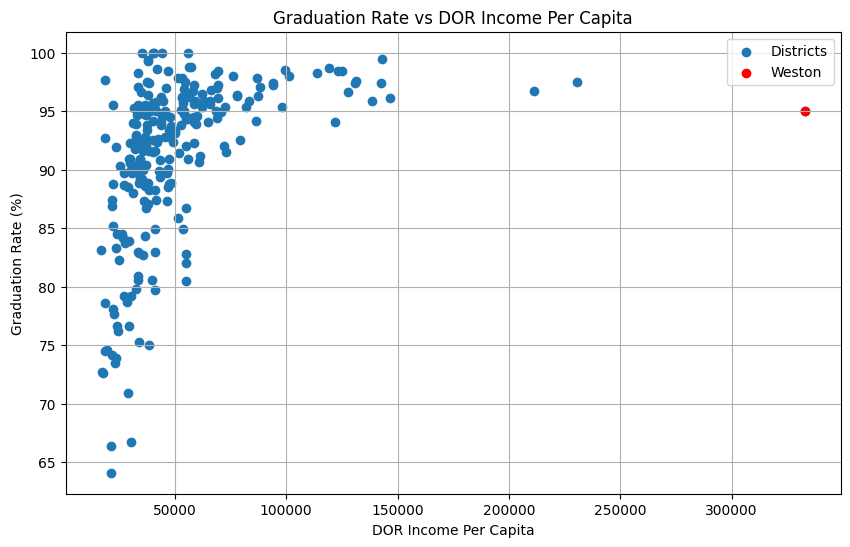

In [21]:
# E.T. # Create a scatterplot to visualize the relationship between DOR income per capita and graduation rate
import matplotlib.pyplot as plt

# Create base scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['DOR_income_per_capita'], df['graduation_rate_pct'], label='Districts')

# Highlight Weston
weston = df.query('graduation_rate_pct > 80 and DOR_income_per_capita > 300000')
plt.scatter(weston['DOR_income_per_capita'], weston['graduation_rate_pct'], color='red', label='Weston')


# Plot aesthetics
plt.xlabel('DOR Income Per Capita')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate vs DOR Income Per Capita')
plt.legend()
plt.grid(True)
plt.show()


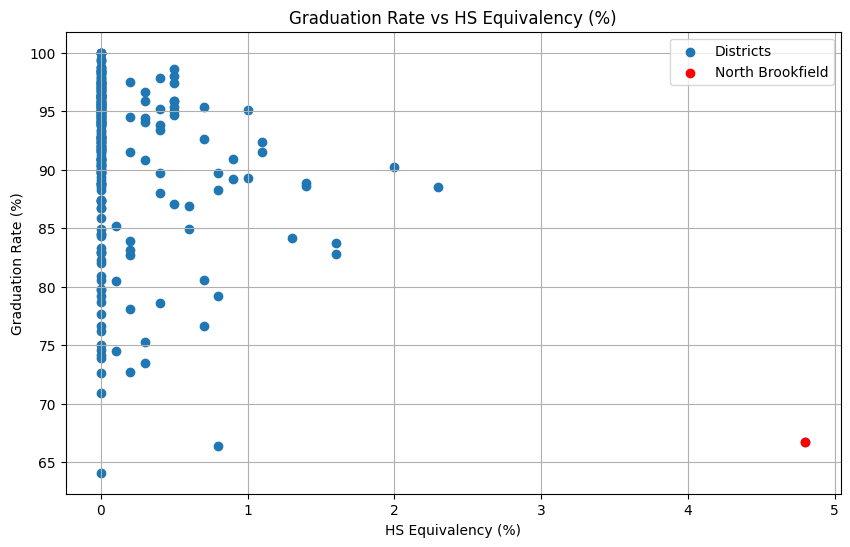

In [22]:
# E.T.# Create a scatterplot to visualize the relationship between HS Equivalency and Graduation Rate
import matplotlib.pyplot as plt

# Create base scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['hs_equivalency_pct'], df['graduation_rate_pct'], label='Districts')

# Highlight North Brookfield in red
nb = df.query('graduation_rate_pct < 80 and hs_equivalency_pct > 4')
plt.scatter(nb['hs_equivalency_pct'], nb['graduation_rate_pct'], color='red', label='North Brookfield')

# Plot aesthetics
plt.xlabel('HS Equivalency (%)')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate vs HS Equivalency (%)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
df.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,
Abby Kelley Foster Charter Public (District),70.7,18.0,58.9,11.7,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,2.423144e+07,17114.65,100.0,0.0,0.0,0.0,0.0,11.9,81.5,40029.375
Abington,47.3,11.0,34.4,17.8,Not requiring assistance or intervention,Moderate progress toward targets,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,0.0,9.2,13.9,81.3,37848.000
Academy Of the Pacific Rim Charter Public (District),71.1,9.4,58.5,24.6,Not requiring assistance or intervention,Moderate progress toward targets,48.0,1.280195e+07,27392.63,96.3,1.9,0.0,0.0,1.9,9.4,37.3,55038.000
Acton-Boxborough,29.6,6.2,10.6,15.5,Not requiring assistance or intervention,Meeting or exceeding targets,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,0.0,0.4,13.0,88.3,69189.500
Advanced Math and Science Academy Charter (District),26.0,1.4,16.0,6.8,Not requiring assistance or intervention,Meeting or exceeding targets,82.0,1.506501e+07,15623.23,99.3,0.7,0.0,0.0,0.0,12.0,80.8,37880.000


In [24]:
# E.T.
# Lets see how many school name has "charter" in their name 
charter_schools = df[df.index.str.contains("charter", case=False)]

# Print number of charter schools
print(f"Number of schools/districts with 'charter' in the name: {len(charter_schools)}")


Number of schools/districts with 'charter' in the name: 24


In [25]:
df.shape

(247, 17)

In [26]:
# E.T.
# Drop rows where the district or school name contains 'Charter'
df = df[~df.index.str.contains("Charter", case=False)]


In [27]:
df.shape

(223, 17)

In [28]:
df['overall_classification'].value_counts()

overall_classification
Not requiring assistance or intervention    214
Requiring assistance or intervention          9
Name: count, dtype: int64

In [29]:
df['reason_for_classification'].value_counts()

reason_for_classification
Moderate progress toward targets          93
Substantial progress toward targets       85
Meeting or exceeding targets              33
In need of focused/targeted support        6
Limited or no progress toward targets      3
In need of broad/comprehensive support     3
Name: count, dtype: int64

In [30]:
df.isna().sum()

high_needs_pct                             0
english_learners_pct                       0
low_income_pct                             0
students_with_disabilities_pct             0
overall_classification                     0
reason_for_classification                  0
progress_toward_improvement_targets_pct    0
in_district_expenditures                   0
in_district_expenditures_per_pupil         0
graduation_rate_pct                        0
still_in_school_pct                        0
non_grad_completers_pct                    0
hs_equivalency_pct                         0
dropout_rate_pct                           0
student_teacher_ratio                      0
experienced_teachers_pct                   0
DOR_income_per_capita                      0
dtype: int64

In [31]:
# E.T.
df[df['DOR_income_per_capita'].isnull()].head()

## We should check these schools before we go deep in preprocessing, also do we want to keep this feature? 

## I think the issue is now fixed...

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,overall_classification,reason_for_classification,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita
district_name,,,,,,,,,,,,,,,,,


# E.T.
### Lets start the one hot encoding for categorical variables
#### One-hot encode the categorical variables

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define your categorical columns
categorical_cols = ['overall_classification', 'reason_for_classification']

# Create OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical data
ohe_array = ohe.fit_transform(df[categorical_cols])

# Get the new column names AFTER fitting
ohe_columns = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame
df_ohe = pd.DataFrame(ohe_array, columns=ohe_columns, index=df.index)

# Drop original categorical columns and concatenate encoded ones
df_encoded = pd.concat([df.drop(columns=categorical_cols), df_ohe], axis=1)
df_encoded.shape
df_encoded.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,...,experienced_teachers_pct,DOR_income_per_capita,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,47.3,11.0,34.4,17.8,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,...,81.3,37848.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Acton-Boxborough,29.6,6.2,10.6,15.5,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,...,88.3,69189.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Agawam,51.4,6.2,40.7,18.3,46.0,7.195848e+07,20414.91,88.0,1.1,1.9,...,89.4,31126.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Amesbury,46.4,2.7,33.8,23.7,47.0,3.996617e+07,22338.70,88.3,2.5,0.8,...,89.0,41139.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Amherst-Pelham,44.0,7.3,29.8,24.2,33.0,3.248902e+07,26177.60,90.9,4.1,0.9,...,81.3,34325.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
df_encoded.shape

(223, 23)

In [34]:
df_encoded.isnull().sum()

high_needs_pct                                                      0
english_learners_pct                                                0
low_income_pct                                                      0
students_with_disabilities_pct                                      0
progress_toward_improvement_targets_pct                             0
in_district_expenditures                                            0
in_district_expenditures_per_pupil                                  0
graduation_rate_pct                                                 0
still_in_school_pct                                                 0
non_grad_completers_pct                                             0
hs_equivalency_pct                                                  0
dropout_rate_pct                                                    0
student_teacher_ratio                                               0
experienced_teachers_pct                                            0
DOR_income_per_capit

In [35]:
df_encoded.dtypes

high_needs_pct                                                      float64
english_learners_pct                                                float64
low_income_pct                                                      float64
students_with_disabilities_pct                                      float64
progress_toward_improvement_targets_pct                             float64
in_district_expenditures                                            float64
in_district_expenditures_per_pupil                                  float64
graduation_rate_pct                                                 float64
still_in_school_pct                                                 float64
non_grad_completers_pct                                             float64
hs_equivalency_pct                                                  float64
dropout_rate_pct                                                    float64
student_teacher_ratio                                               float64
experienced_

In [36]:
df.shape

(223, 17)

In [37]:
# E.T.
# Count the number of district names containing 'charter'
charter_count = df.index.str.contains("charter", case=False).sum()

# Print the count
print(f"Number of districts with 'charter' in the name: {charter_count}")


Number of districts with 'charter' in the name: 0


In [38]:
# E.T.
# Count the number of district names containing 'regional'
regional_count = df.index.str.contains("regional", case=False).sum()

# Print the count
print(f"Number of districts with 'regional' in the name: {regional_count}")

Number of districts with 'regional' in the name: 5


In [39]:
df_encoded.shape

(223, 23)

In [40]:
df_encoded.isnull().sum()

high_needs_pct                                                      0
english_learners_pct                                                0
low_income_pct                                                      0
students_with_disabilities_pct                                      0
progress_toward_improvement_targets_pct                             0
in_district_expenditures                                            0
in_district_expenditures_per_pupil                                  0
graduation_rate_pct                                                 0
still_in_school_pct                                                 0
non_grad_completers_pct                                             0
hs_equivalency_pct                                                  0
dropout_rate_pct                                                    0
student_teacher_ratio                                               0
experienced_teachers_pct                                            0
DOR_income_per_capit

In [41]:
df_encoded.head()

## We decided to apply a log transformation to the in_district_expenditures column. Based on our EDA, there was a significant difference between the mean and median, indicating a skewed distribution. 
## The log transformation will help reduce this skew and make the data more suitable for modeling

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,...,experienced_teachers_pct,DOR_income_per_capita,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,47.3,11.0,34.4,17.8,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,...,81.3,37848.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Acton-Boxborough,29.6,6.2,10.6,15.5,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,...,88.3,69189.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Agawam,51.4,6.2,40.7,18.3,46.0,7.195848e+07,20414.91,88.0,1.1,1.9,...,89.4,31126.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Amesbury,46.4,2.7,33.8,23.7,47.0,3.996617e+07,22338.70,88.3,2.5,0.8,...,89.0,41139.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Amherst-Pelham,44.0,7.3,29.8,24.2,33.0,3.248902e+07,26177.60,90.9,4.1,0.9,...,81.3,34325.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
# Create a new column with log-transformed values (log1p handles zero safely)
df_encoded['log_in_district_expenditures'] = np.log1p(df_encoded['in_district_expenditures'])
df_encoded.head()

,high_needs_pct,english_learners_pct,low_income_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,...,DOR_income_per_capita,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,47.3,11.0,34.4,17.8,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,...,37848.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.387952
Acton-Boxborough,29.6,6.2,10.6,15.5,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,...,69189.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.426312
Agawam,51.4,6.2,40.7,18.3,46.0,7.195848e+07,20414.91,88.0,1.1,1.9,...,31126.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.091600
Amesbury,46.4,2.7,33.8,23.7,47.0,3.996617e+07,22338.70,88.3,2.5,0.8,...,41139.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.503544
Amherst-Pelham,44.0,7.3,29.8,24.2,33.0,3.248902e+07,26177.60,90.9,4.1,0.9,...,34325.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,17.296413


### Here is the distribution of in_district_expenditures after log transformation

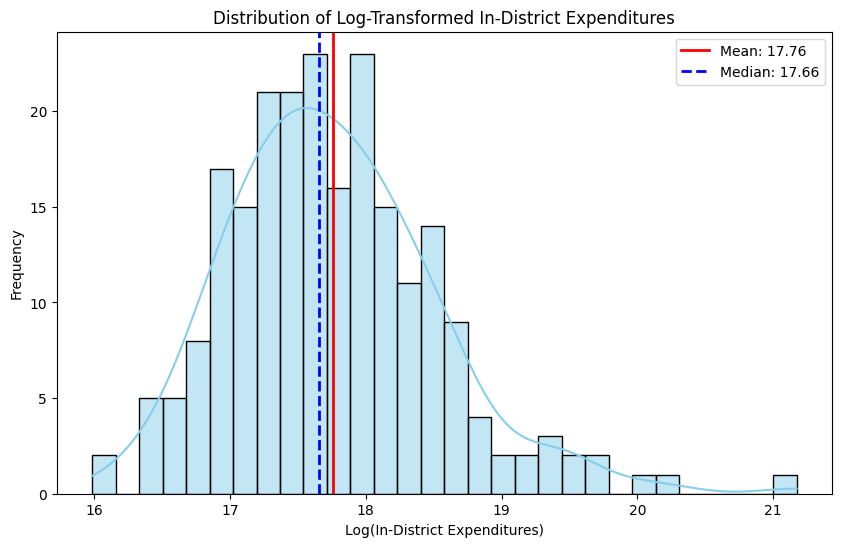

In [43]:
# Calculate mean and median
log_mean = df_encoded['log_in_district_expenditures'].mean()
log_median = df_encoded['log_in_district_expenditures'].median()

# Plot the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['log_in_district_expenditures'], bins=30, kde=True, color='skyblue')

# Add mean and median lines
plt.axvline(log_mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {log_mean:.2f}')
plt.axvline(log_median, color='blue', linestyle='--', linewidth=2, label=f'Median: {log_median:.2f}')

# Titles and labels
plt.title("Distribution of Log-Transformed In-District Expenditures")
plt.xlabel("Log(In-District Expenditures)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### A.F.
Based on the correlation heat map, there is a strong correlation between 'high_needs_pct' and 'low_income_pct'.  This is explored here to determine if a new feature can be created encompassing both values. 

In [44]:
correlation = df['high_needs_pct'].corr(df['low_income_pct'])  
print(correlation)

0.9868909208590384


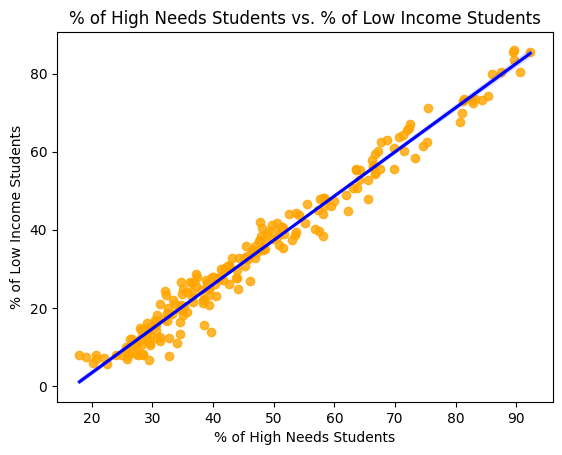

In [45]:
# Scatter plot with regression line
sns.regplot(x='high_needs_pct', y='low_income_pct', data=df, color = "orange", scatter=True, line_kws={"color": "blue"})
plt.xlabel('% of High Needs Students')
plt.ylabel('% of Low Income Students')
plt.title('% of High Needs Students vs. % of Low Income Students')
plt.show()

In [46]:
# Five number summary of the 'high_needs_pct' and 'low_income_pct' columns
summary_high_needs = df['high_needs_pct'].describe()
summary_low_income = df['low_income_pct'].describe()

print("Five Number Summary for High Needs Percentage:")
print(summary_high_needs)

Five Number Summary for High Needs Percentage:
count    223.000000
mean      46.479821
std       17.473859
min       18.000000
25%       32.450000
50%       42.700000
75%       57.900000
max       92.300000
Name: high_needs_pct, dtype: float64


In [47]:
print("\nFive Number Summary for Low Income Percentage:")
print(summary_low_income)


Five Number Summary for Low Income Percentage:
count    223.000000
mean      33.319283
std       20.054137
min        5.600000
25%       16.650000
50%       29.800000
75%       44.850000
max       86.000000
Name: low_income_pct, dtype: float64


In [48]:
# create new column name needs_income_avg_pct and take the average of low_income_pct and high_needs_pct
df_encoded['needs_income_avg_pct'] = df_encoded[['low_income_pct', 'high_needs_pct']].mean(axis=1)

# drop the columns that are not needed anymore
df_encoded.drop(columns=['low_income_pct', 'high_needs_pct'], inplace=True)


In [49]:
df_encoded.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,11.0,17.8,39.0,3.560342e+07,16609.95,88.9,1.3,0.7,0.0,9.2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85.0,1.005648e+08,19407.68,96.1,3.2,0.2,0.0,0.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.426312,20.10
Agawam,6.2,18.3,46.0,7.195848e+07,20414.91,88.0,1.1,1.9,0.4,8.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.091600,46.05
Amesbury,2.7,23.7,47.0,3.996617e+07,22338.70,88.3,2.5,0.8,0.8,7.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33.0,3.248902e+07,26177.60,90.9,4.1,0.9,0.9,3.2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,17.296413,36.90


# E.T.
## Saving the data 

In [50]:

df_encoded.to_excel("../Data/cleaned_data_encoded.xlsx", index=True)

# E.T. 
### Train and Test split

In [51]:
# E.T.
# test train splitfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df_encoded.drop(columns=['graduation_rate_pct'])
y = df_encoded['graduation_rate_pct']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (178, 22)
X_test shape: (45, 22)
y_train shape: (178,)
y_test shape: (45,)


In [52]:
X_train.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Mohawk Trail,0.8,23.3,49.0,2.108065e+07,26406.92,3.3,3.3,0.0,10.0,10.6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,16.863866,48.95
Gateway,1.7,25.0,31.0,1.833836e+07,23328.28,0.0,0.0,0.0,4.7,9.3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.724506,53.20
Groton-Dunstable,1.9,16.6,73.0,4.669791e+07,19902.79,1.2,0.0,0.0,0.6,12.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.659210,17.90
Leominster,13.8,23.8,54.0,1.021028e+08,17132.78,3.6,2.8,0.0,3.0,13.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.441491,60.75
Melrose,5.0,16.6,63.0,5.899651e+07,15247.73,1.8,0.0,0.0,1.3,14.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.892989,23.05


In [53]:
y_train.head()

district_name
Mohawk Trail        83.3
Gateway             95.3
Groton-Dunstable    98.2
Leominster          90.6
Melrose             96.9
Name: graduation_rate_pct, dtype: float64

In [54]:
X_test.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Athol-Royalston,2.4,24.8,23.0,2.813300e+07,17920.25,9.5,1.2,0.0,4.8,13.3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.152454,67.85
Holyoke,18.3,30.2,46.0,1.234559e+08,24923.46,9.9,2.3,0.0,13.2,11.4,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,18.631394,87.55
Medford,12.7,20.8,42.0,9.282876e+07,22254.69,2.1,0.6,0.3,6.2,10.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.346267,46.55
North Middlesex,2.4,24.1,22.0,5.410222e+07,18174.01,3.3,0.0,0.0,1.7,12.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.806386,35.70
Winthrop,9.5,16.1,56.0,3.308017e+07,16958.10,1.5,0.0,0.0,5.9,12.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.314445,44.40


In [55]:
y_test.head()

district_name
Athol-Royalston    84.5
Holyoke            74.6
Medford            90.8
North Middlesex    95.0
Winthrop           92.6
Name: graduation_rate_pct, dtype: float64

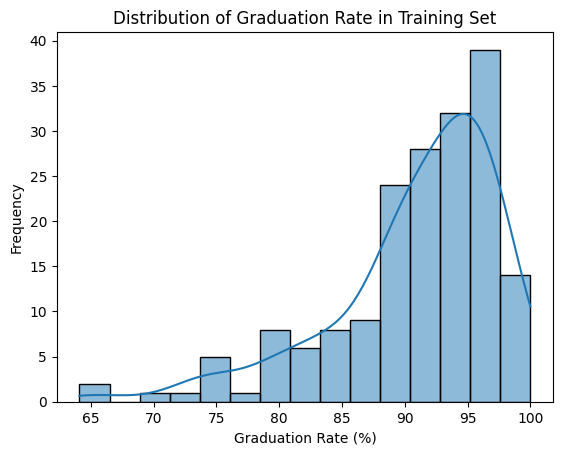

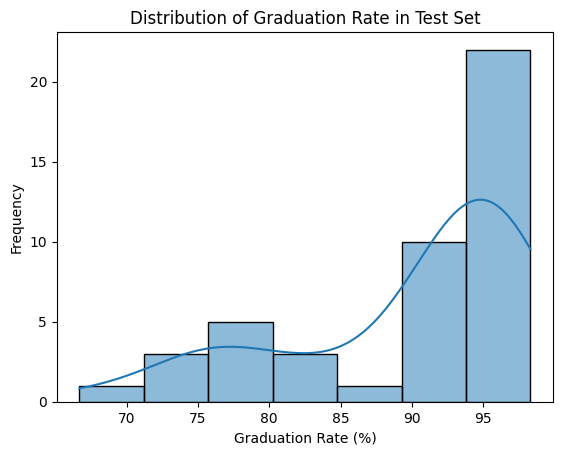

In [56]:
#check the datas if normally distributed
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

### Checking the distribution of each predictors in the X_train and X_test

In [57]:
X_train.columns

Index(['english_learners_pct', 'students_with_disabilities_pct',
       'progress_toward_improvement_targets_pct', 'in_district_expenditures',
       'in_district_expenditures_per_pupil', 'still_in_school_pct',
       'non_grad_completers_pct', 'hs_equivalency_pct', 'dropout_rate_pct',
       'student_teacher_ratio', 'experienced_teachers_pct',
       'DOR_income_per_capita',
       'overall_classification_Not requiring assistance or intervention',
       'overall_classification_Requiring assistance or intervention',
       'reason_for_classification_In need of broad/comprehensive support',
       'reason_for_classification_In need of focused/targeted support',
       'reason_for_classification_Limited or no progress toward targets',
       'reason_for_classification_Meeting or exceeding targets',
       'reason_for_classification_Moderate progress toward targets',
       'reason_for_classification_Substantial progress toward targets',
       'log_in_district_expenditures', 'needs_inco

# E.T.
#### Importing the StandardScaler for feature scaling


In [59]:
# scale from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
# Print the first few rows of the scaled training data


In [60]:
X_train_scaled.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Mohawk Trail,-0.735186,1.308002,-0.287253,-0.423558,1.656426,-0.155009,2.100148,-0.424694,1.341175,-0.922858,...,-4.609772,4.609772,-0.1066,5.354126,0.0,-0.413585,-0.883176,-0.767649,-1.158075,0.495694
Gateway,-0.626666,1.867597,-1.350022,-0.443957,0.819300,-1.375551,-0.591010,-0.424694,0.049693,-1.822771,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,1.132277,-0.767649,-1.337178,0.729174
Groton-Dunstable,-0.602550,-0.897460,1.129772,-0.232996,-0.112141,-0.931718,-0.591010,-0.424694,-0.949378,0.530848,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,-0.883176,1.302678,-0.135915,-1.210085
Leominster,0.832325,1.472589,0.007961,0.179151,-0.865346,-0.044051,1.692397,-0.424694,-0.364556,1.292313,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,-0.883176,1.302678,0.869456,1.143945
Melrose,-0.228759,-0.897460,0.539345,-0.141509,-1.377919,-0.709801,-0.591010,-0.424694,-0.778804,1.846105,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,-0.883176,1.302678,0.164533,-0.927162


In [61]:
X_test_scaled.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Athol-Royalston,-0.542261,1.801762,-1.822363,-0.371096,-0.651222,2.138130,0.387593,-0.424694,0.074061,0.946192,...,0.216930,-0.216930,-0.106600,-0.186772,1.0,-0.413585,-0.883176,-0.767649,-0.787188,1.533995
Holyoke,1.374926,3.579299,-0.464381,0.337993,1.253052,2.286075,1.284646,-0.424694,2.120938,-0.369065,...,-4.609772,4.609772,9.380832,-0.186772,0.0,-0.413585,-0.883176,-0.767649,1.113516,2.616244
Medford,0.699690,0.485069,-0.700552,0.110163,0.527375,-0.598843,-0.101709,0.424694,0.415207,-0.922858,...,0.216930,-0.216930,-0.106600,-0.186772,0.0,-0.413585,1.132277,-0.767649,0.747076,0.363847
North Middlesex,-0.542261,1.571341,-1.881406,-0.177916,-0.582221,-0.155009,-0.591010,-0.424694,-0.681334,0.115503,...,0.216930,-0.216930,-0.106600,-0.186772,1.0,-0.413585,-0.883176,-0.767649,0.053232,-0.232215
Winthrop,0.313841,-1.062047,0.126046,-0.334295,-0.912844,-0.820759,-0.591010,-0.424694,0.342104,0.669296,...,0.216930,-0.216930,-0.106600,-0.186772,0.0,-0.413585,-0.883176,1.302678,-0.579000,0.245733


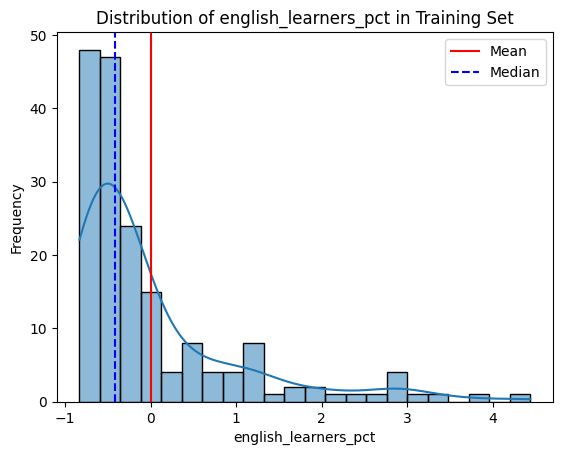

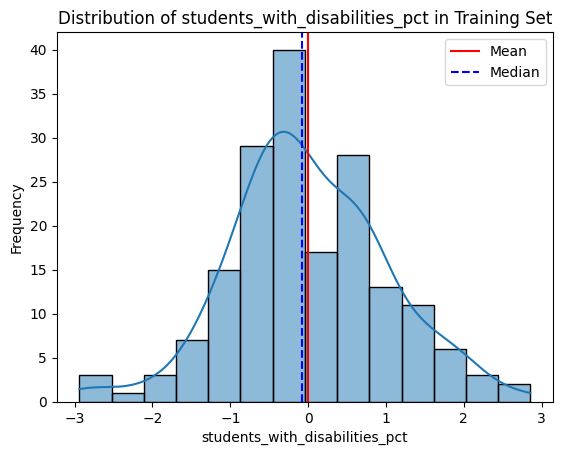

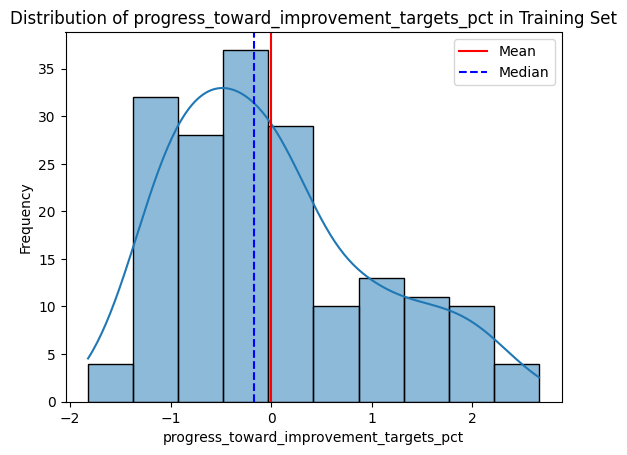

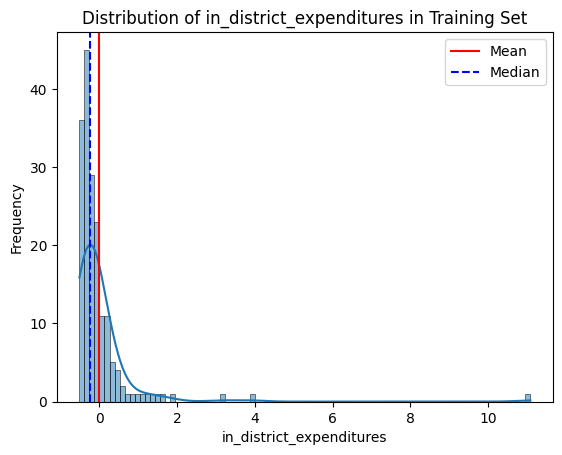

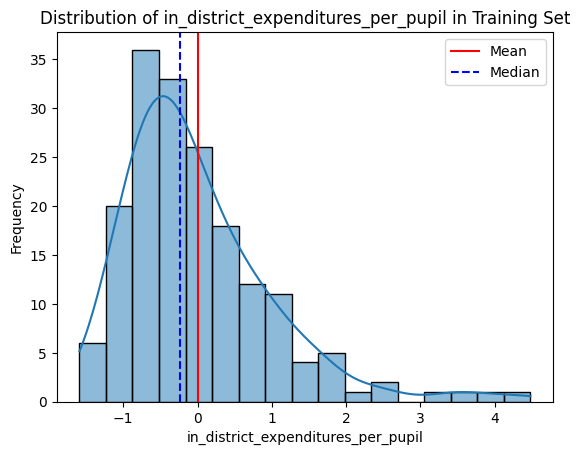

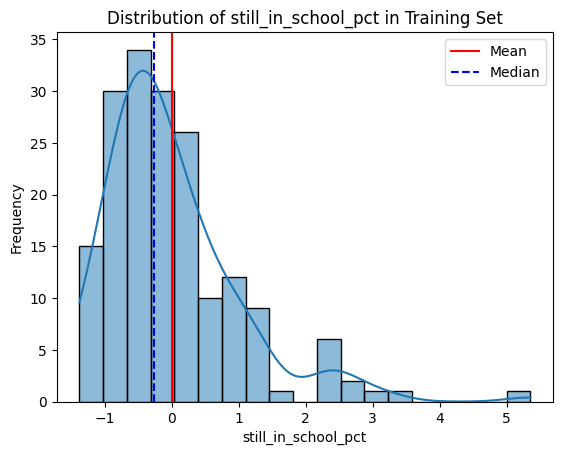

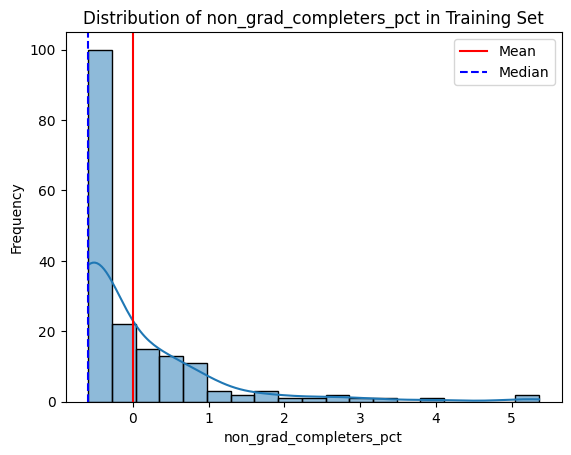

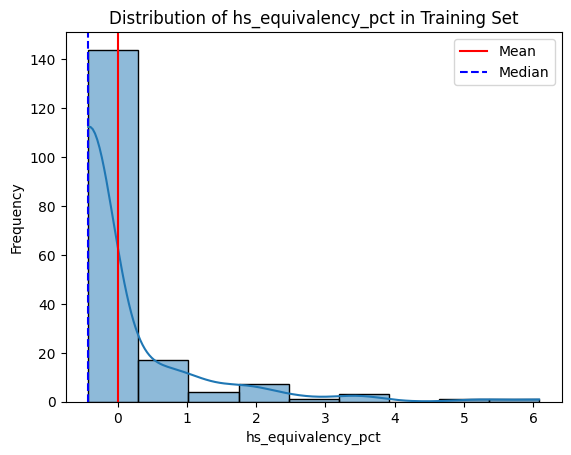

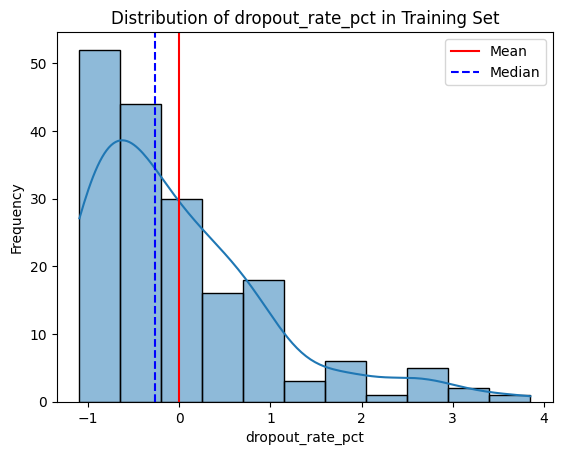

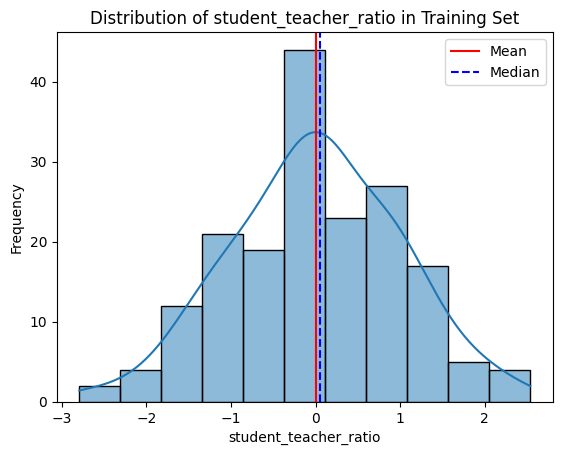

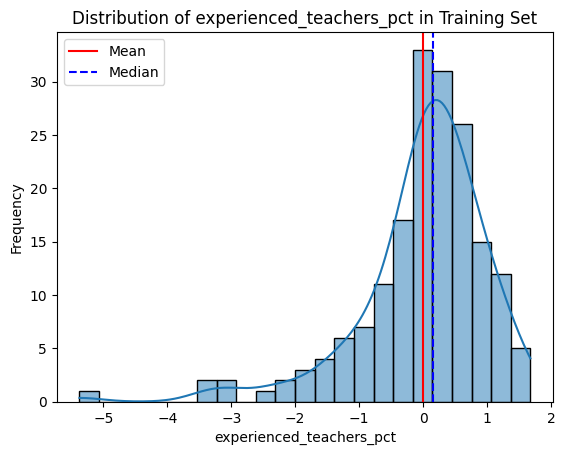

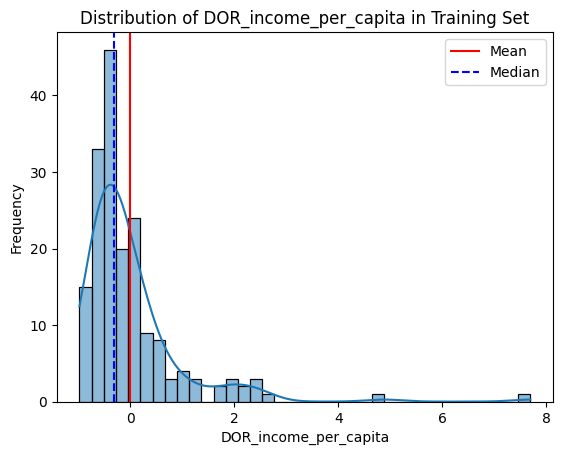

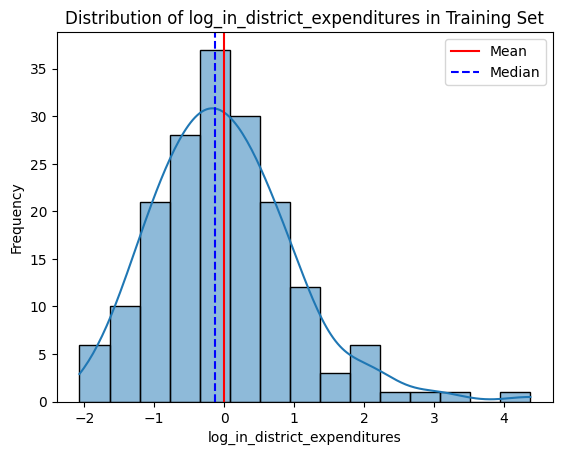

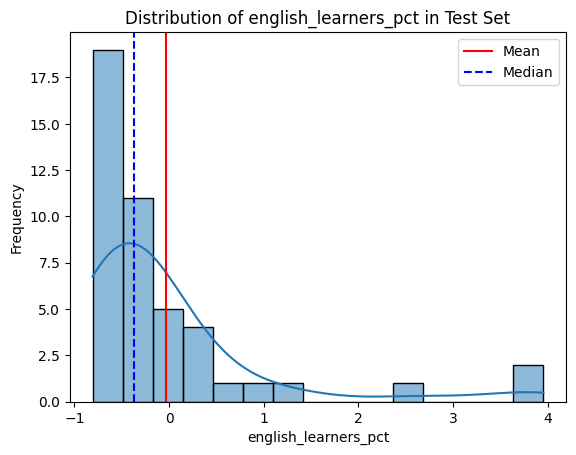

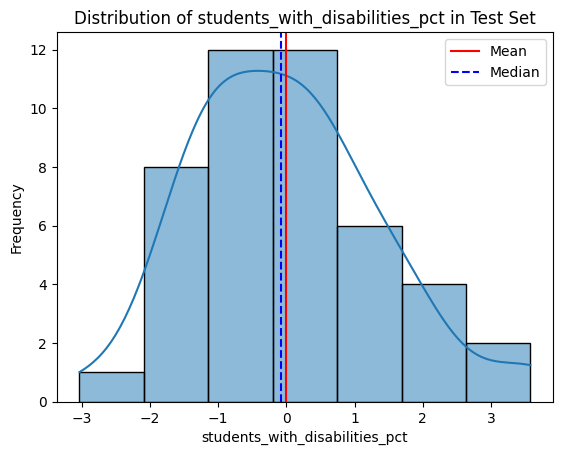

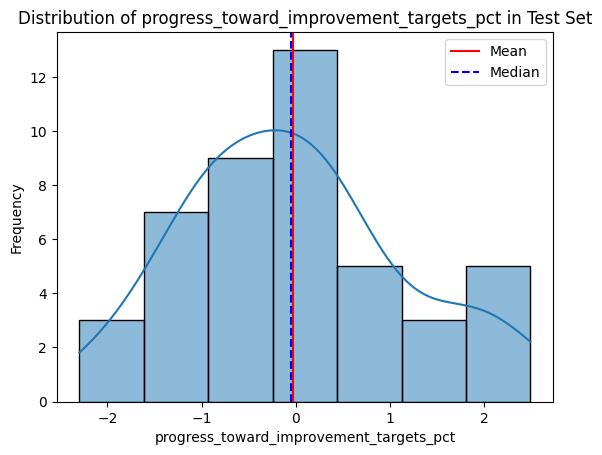

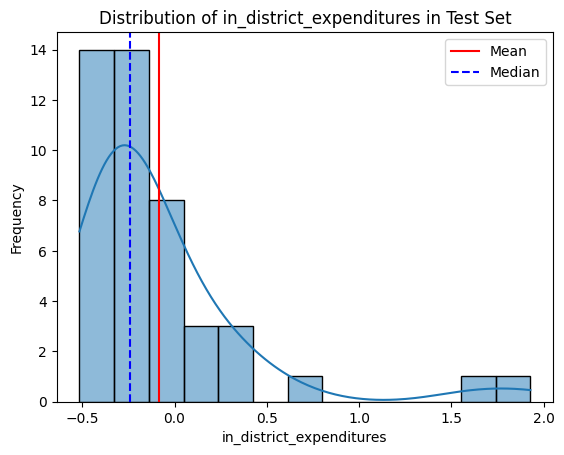

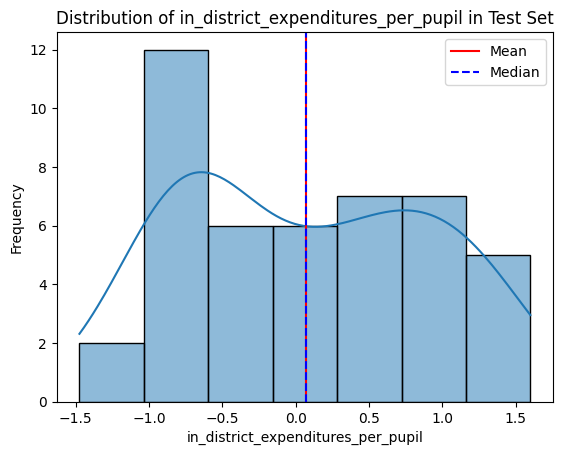

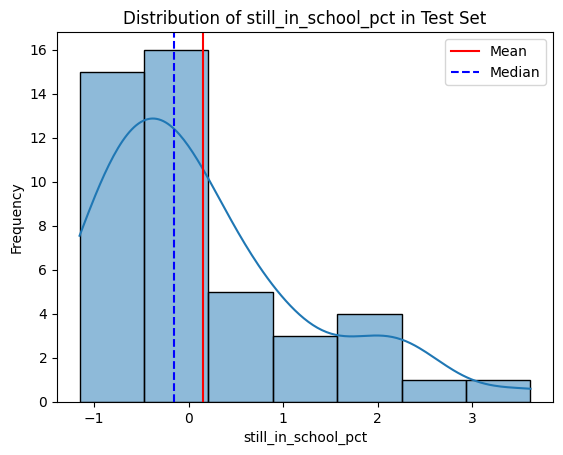

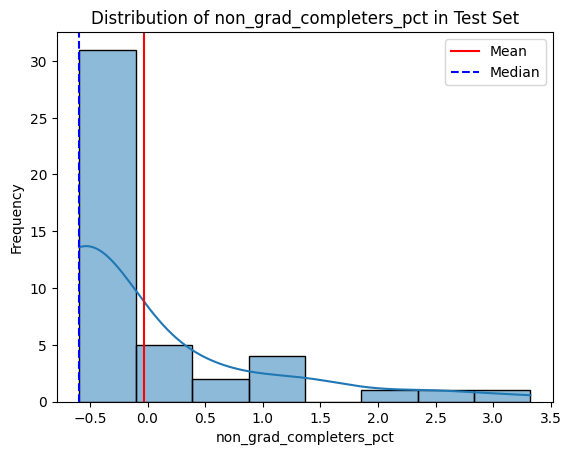

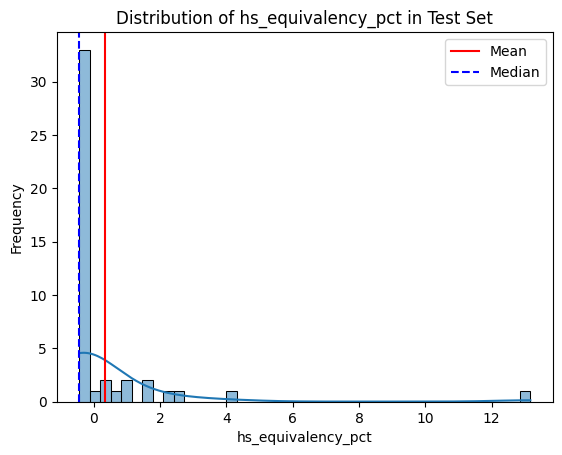

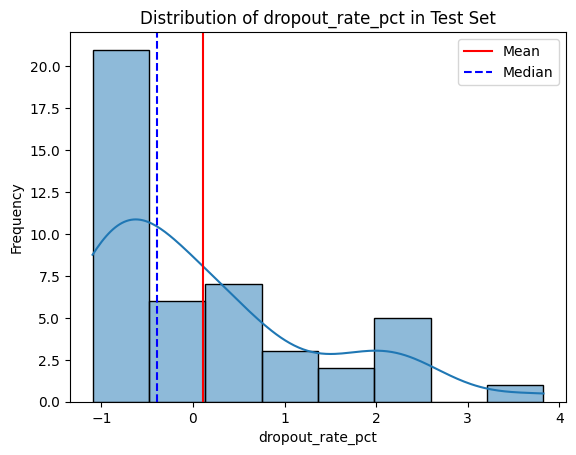

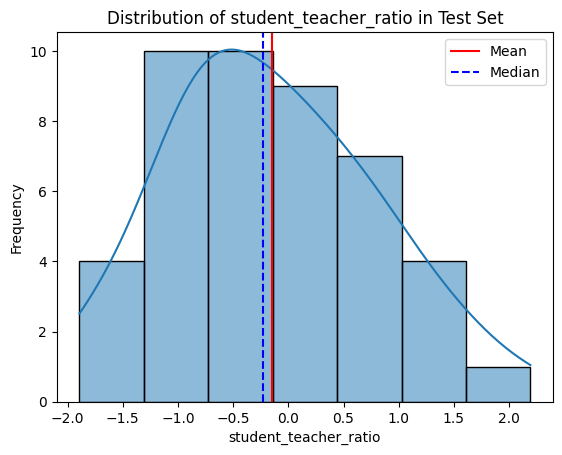

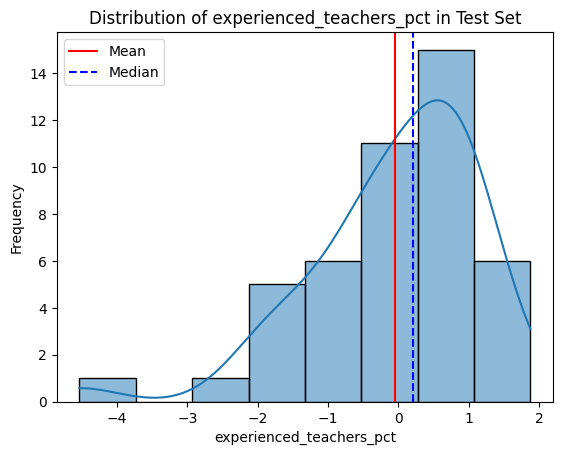

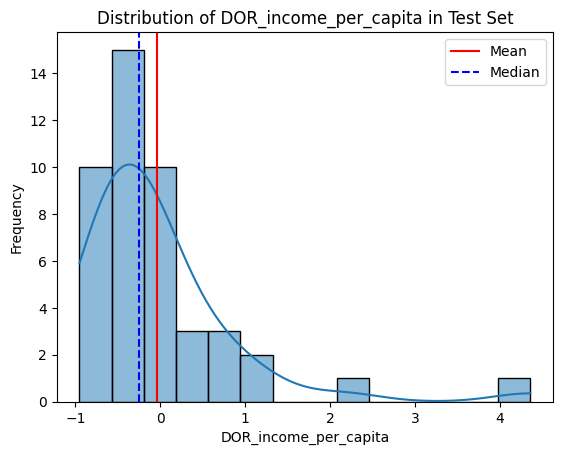

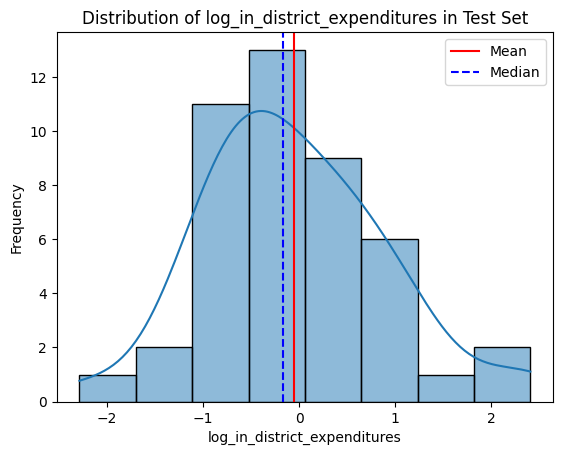

In [62]:
# check all the numerical values distribution in X_train and X_test except the onehot encoded columns, write mean and median values as legend
exclude_cols = [
    'needs_income_avg_pct',
    'overall_classification_Not requiring assistance or intervention',
    'overall_classification_Requiring assistance or intervention',
    'reason_for_classification_In need of broad/comprehensive support',
    'reason_for_classification_In need of focused/targeted support',
    'reason_for_classification_Limited or no progress toward targets',
    'reason_for_classification_Meeting or exceeding targets',
    'reason_for_classification_Moderate progress toward targets',
    'reason_for_classification_Substantial progress toward targets'
]
numerical_cols = [col for col in X_train_scaled.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

for col in numerical_cols:
    sns.histplot(X_train_scaled[col], kde=True)
    plt.axvline(X_train_scaled[col].mean(), color='red', label='Mean', linestyle='-')
    plt.axvline(X_train_scaled[col].median(), color='blue', label='Median', linestyle='--')
    plt.title(f"Distribution of {col} in Training Set")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
for col in numerical_cols:
    sns.histplot(X_test_scaled[col], kde=True)
    plt.axvline(X_test_scaled[col].mean(), color='red', label='Mean', linestyle='-')
    plt.axvline(X_test_scaled[col].median(), color='blue', label='Median', linestyle='--')
    plt.title(f"Distribution of {col} in Test Set")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()